In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./4K_House_Rent_Dataset.csv')
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [4]:
y = data['Rent']
X = np.column_stack((data['Size'], data['Bathroom']))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [6]:
w = np.array((-40, -40))
alpha = .1
tolerance = 1e-3

old_w = []
errors = []

In [7]:
itt = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, y)
    new_w = w - alpha * gradient

    if itt % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (itt, error))
        old_w.append(new_w)
        errors.append(error)

    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break

    itt += 1
    w = new_w

print('w =', w)

Iteration: 10 - Error: 6081557511.7011
Iteration: 20 - Error: 6039046401.2834
Iteration: 30 - Error: 6036813199.8865
Iteration: 40 - Error: 6035992475.9747
Iteration: 50 - Error: 6035518088.9373
Iteration: 60 - Error: 6035237823.0002
Iteration: 70 - Error: 6035072107.6334
Iteration: 80 - Error: 6034974120.6582
Iteration: 90 - Error: 6034916181.2033
Iteration: 100 - Error: 6034881921.7462
Iteration: 110 - Error: 6034861664.2136
Iteration: 120 - Error: 6034849685.9843
Iteration: 130 - Error: 6034842603.2869
Iteration: 140 - Error: 6034838415.3053
Iteration: 150 - Error: 6034835938.9621
Iteration: 160 - Error: 6034834474.7065
Iteration: 170 - Error: 6034833608.8957
Iteration: 180 - Error: 6034833096.9440
Iteration: 190 - Error: 6034832794.2281
Iteration: 200 - Error: 6034832615.2330
w = [15030.52402641 23319.3090844 ]


In [10]:
all_ws = np.array(old_w)

errors.append(6000)
errors.append(5000)
errors.append(4000)
errors.append(3000)
errors.append(2000)

levels = np.sort(np.array(errors))

In [8]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [9]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, y)[1]

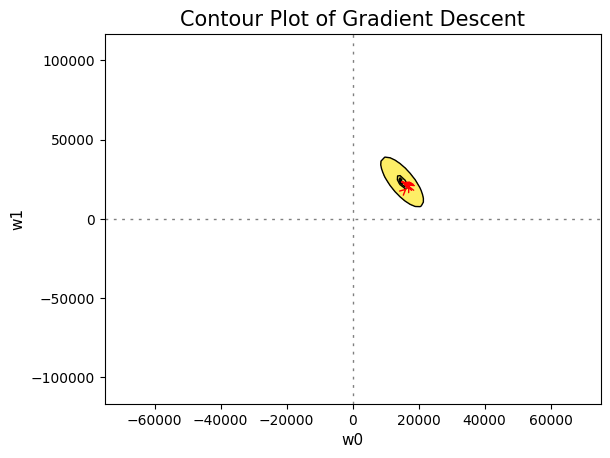

In [11]:
plt.contourf(w0, w1, mse_vals, levels=np.sort(np.array(errors)), alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4], linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4], linewidth=1)
for i in range(len(old_w) - 1):
    if i + 1 < len(all_ws):
        plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                     va='center', ha='center')

sorted_errors = np.sort(np.array(errors))
CS = plt.contour(w0, w1, mse_vals, levels=sorted_errors, linewidths=1, colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent", fontsize=15)
plt.xlabel("w0", fontsize=11)
plt.ylabel("w1", fontsize=11)
plt.show()